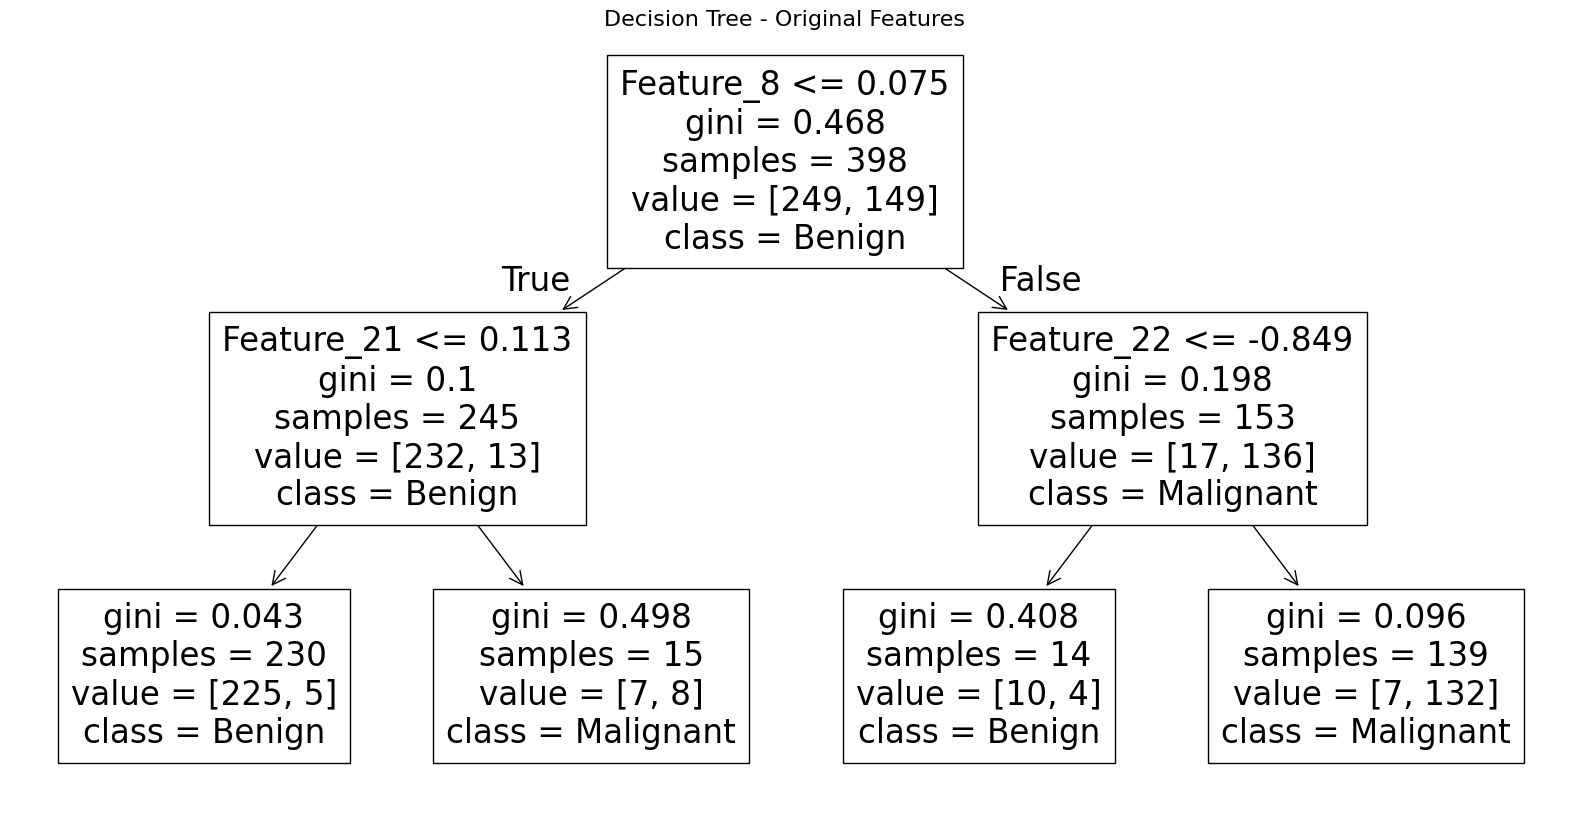

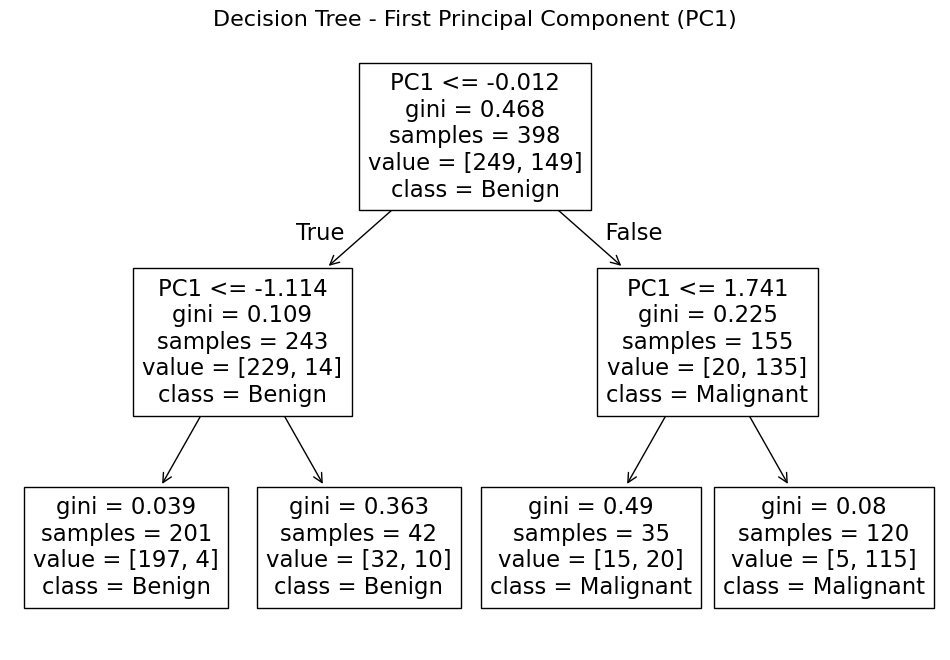

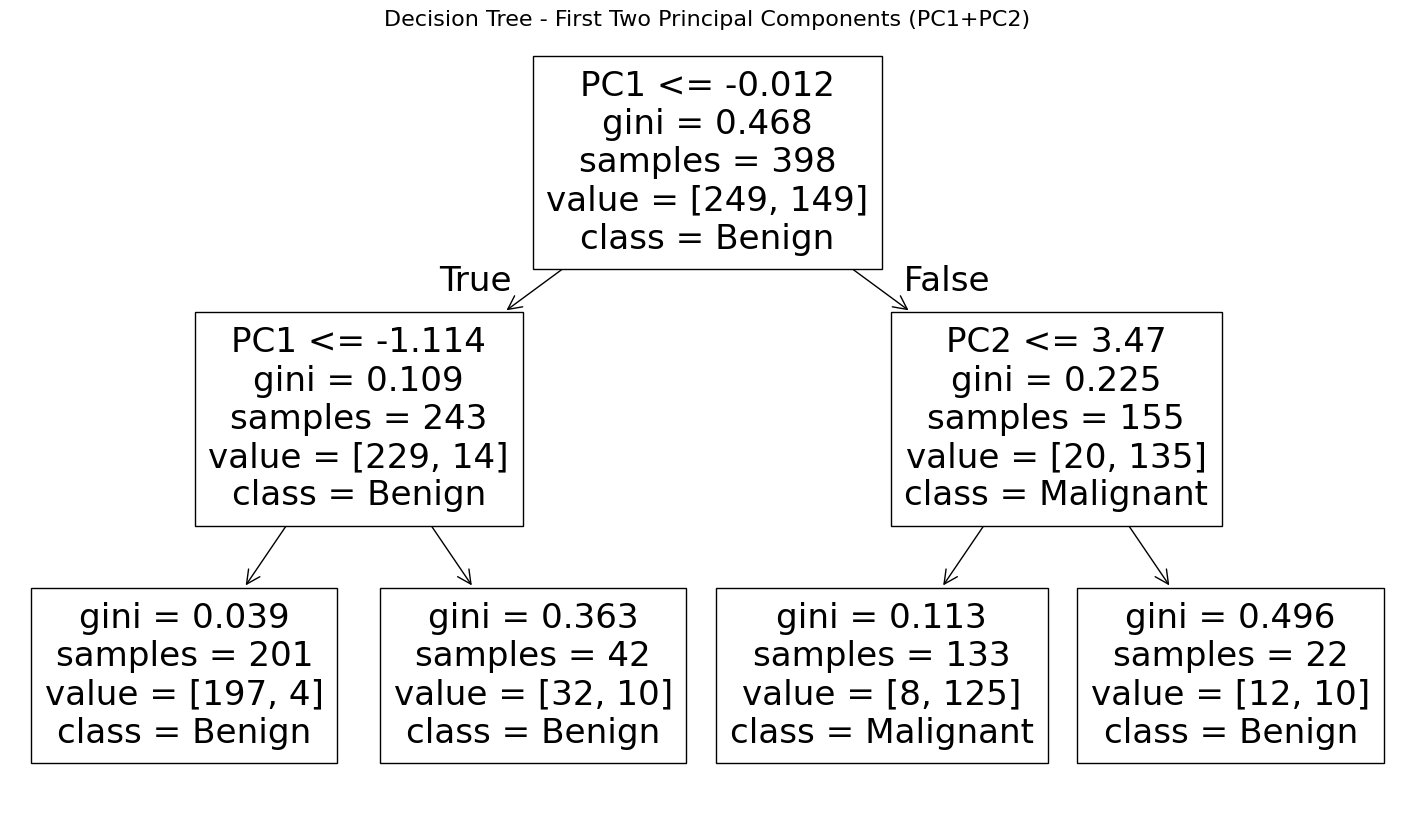


Model performance of Raw data：
F1 Score: 0.9048
Precision: 0.9048
Recall: 0.9048
FP: 6, TP: 57
FPR: 0.0556
TPR/Recall: 0.9048

Model performance of PCA Single principal component：
F1 Score: 0.8992
Precision: 0.8788
Recall: 0.9206
FP: 8, TP: 58
FPR: 0.0741
TPR/Recall: 0.9206

Model performance of PCA two principal components：
F1 Score: 0.8852
Precision: 0.9153
Recall: 0.8571
FP: 5, TP: 54
FPR: 0.0463
TPR/Recall: 0.8571


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)

data["Diagnosis"] = data["Diagnosis"].map({"M": 1, "B": 0})

X = data.drop(["ID", "Diagnosis"], axis=1)
y = data["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_original = DecisionTreeClassifier(
    max_depth=2,
    min_samples_split=5,
    min_samples_leaf=2,
    criterion="gini",
    random_state=42
)
clf_original.fit(X_train_scaled, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf_original, 
          feature_names=X.columns, 
          class_names=["Benign", "Malignant"])
plt.title("Decision Tree - Original Features", fontsize=16)
plt.show()

pca1 = PCA(n_components=1)
X_train_pca1 = pca1.fit_transform(X_train_scaled)
X_test_pca1 = pca1.transform(X_test_scaled)

clf_pca1 = DecisionTreeClassifier(
    max_depth=2,
    min_samples_split=5,
    min_samples_leaf=2,
    criterion="gini",
    random_state=42
)
clf_pca1.fit(X_train_pca1, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_pca1, 
          feature_names=["PC1"], 
          class_names=["Benign", "Malignant"])
plt.title("Decision Tree - First Principal Component (PC1)", fontsize=16)
plt.show()

pca2 = PCA(n_components=2)
X_train_pca2 = pca2.fit_transform(X_train_scaled)
X_test_pca2 = pca2.transform(X_test_scaled)

clf_pca2 = DecisionTreeClassifier(
    max_depth=2,
    min_samples_split=5,
    min_samples_leaf=2,
    criterion="gini",
    random_state=42
)
clf_pca2.fit(X_train_pca2, y_train)

plt.figure(figsize=(18, 10))
plot_tree(clf_pca2, 
          feature_names=["PC1", "PC2"],
          class_names=["Benign", "Malignant"])
plt.title("Decision Tree - First Two Principal Components (PC1+PC2)", fontsize=16)
plt.show()

def print_metrics(name, y_true, y_pred):
    print(f"\nModel performance of {name}：")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    print(f"FP: {fp}, TP: {tp}")
    print(f"FPR: {fpr:.4f}")
    print(f"TPR/Recall: {tpr:.4f}")

print_metrics("Raw data", y_test, clf_original.predict(X_test_scaled))
print_metrics("PCA Single principal component", y_test, clf_pca1.predict(X_test_pca1))
print_metrics("PCA two principal components", y_test, clf_pca2.predict(X_test_pca2))